In [152]:
import pandas as pd

df = pd.read_csv('result.csv')

df.columns = ['Layout', 'Wing', 'Span', 'dV', 'AoA', 'Cx', 'Cy', 'Cz']

In [153]:
df.head()

,Layout,Wing,Span,dV,AoA,Cx,Cy,Cz
0,1,0,0.25,-10,12.0,0.077043,1.15350,-0.108490
1,1,0,0.25,-10,10.0,0.057963,1.00160,-0.031581
2,1,0,0.25,-10,9.0,0.049605,0.92454,0.004812
3,1,0,0.25,-10,8.0,0.042059,0.84677,0.039769
4,1,0,0.25,-10,7.0,0.035338,0.76841,0.073244


In [159]:
df = df.assign(dCx = '0.0')
df = df.assign(dCy = '0.0')
df = df.assign(dMz = '0.0')
df['dCx'] = pd.to_numeric(df['dCx'])
df['dCy'] = pd.to_numeric(df['dCy'])
df['dMz'] = pd.to_numeric(df['dMz'])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15488 entries, 0 to 15487
Data columns (total 11 columns):
Layout    15488 non-null int64
Wing      15488 non-null int64
Span      15488 non-null float64
dV        15488 non-null int64
AoA       15488 non-null float64
Cx        15488 non-null float64
Cy        15488 non-null float64
Cz        15488 non-null float64
dCx       15488 non-null float64
dCy       15488 non-null float64
dMz       15488 non-null float64
dtypes: float64(8), int64(3)
memory usage: 1.3 MB


In [161]:
for i in range(0, len(df)):
    #Save current iteration data in independent variables
    cLayout = df.iloc[i]['Layout']
    cWing =   df.iloc[i]['Wing']
    cSpan =   df.iloc[i]['Span']
    cAoA =    df.iloc[i]['AoA']
    #Get row with zero deflection and same parameters
    cRow1 = df.loc[(df['Layout'] == cLayout)&(df['Wing'] == cWing)&(df['Span'] == cSpan)&(df['AoA'] == cAoA)&(df['dV'] == 0)]
    j = cRow1.index[0]
    #Calculate value of interest
    cdCx = df.iloc[j,5] - df.iloc[i,5]
    cdCy = df.iloc[j,6] - df.iloc[i,6]
    cdMz = df.iloc[j,7] - df.iloc[i,7]
    #Assign these values in dataframe
    df.at[i, 'dCx'] = cdCx
    df.at[i, 'dCy'] = cdCy
    df.at[i, 'dMz'] = cdMz

In [162]:
print(len(df))

15488


In [179]:
#different way to acces row by condition
cRow1 = df.loc[(df['Layout'] == 1)&(df['Wing'] == 0)&(df['Span'] == 0.25)&(df['AoA'] == 12)&(df['dV'] == 0)]
cRow2 = df.query('Layout == 1 & Wing == 0 & Span == 0.25 & AoA == 12 & dV == 0')

print(cRow1)
print(cRow2)

     Layout  Wing  Span  dV   AoA        Cx      Cy       Cz  dCx  dCy  dMz
110       1     0  0.25   0  12.0  0.071491  1.1158 -0.22306  0.0  0.0  0.0
     Layout  Wing  Span  dV   AoA        Cx      Cy       Cz  dCx  dCy  dMz
110       1     0  0.25   0  12.0  0.071491  1.1158 -0.22306  0.0  0.0  0.0


In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

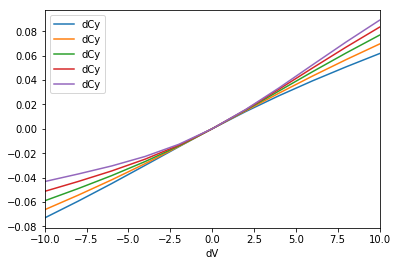

In [173]:
Some_data = df.query('Layout == 1 & Wing == 1 & Span == 0.25')
AoAm4 = Some_data.query('AoA == -4')
AoA0 = Some_data.query('AoA == 0')
AoA4 = Some_data.query('AoA == 4')
AoA8 = Some_data.query('AoA == 8')
AoA12 = Some_data.query('AoA == 12')
ax = plt.gca()
AoAm4.plot(x = 'dV', y = 'dCy', ax = ax)
AoA0.plot(x = 'dV', y = 'dCy', ax = ax)
AoA4.plot(x = 'dV', y = 'dCy', ax = ax)
AoA8.plot(x = 'dV', y = 'dCy', ax = ax)
AoA12.plot(x = 'dV', y = 'dCy', ax = ax)
plt.show()

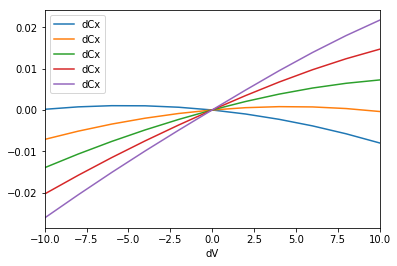

In [172]:
Some_data = df.query('Layout == 5 & Wing == 0 & Span == 0.90')
AoAm4 = Some_data.query('AoA == -4')
AoA0 = Some_data.query('AoA == 0')
AoA4 = Some_data.query('AoA == 4')
AoA8 = Some_data.query('AoA == 8')
AoA12 = Some_data.query('AoA == 12')
ax = plt.gca()
AoAm4.plot(x = 'dV', y = 'dCx', ax = ax)
AoA0.plot(x = 'dV', y = 'dCx', ax = ax)
AoA4.plot(x = 'dV', y = 'dCx', ax = ax)
AoA8.plot(x = 'dV', y = 'dCx', ax = ax)
AoA12.plot(x = 'dV', y = 'dCx', ax = ax)
plt.show()

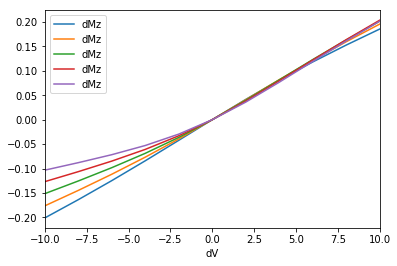

In [177]:
Some_data = df.query('Layout == 5 & Wing == 0 & Span == 0.25')
AoAm4 = Some_data.query('AoA == -4')
AoA0 = Some_data.query('AoA == 0')
AoA4 = Some_data.query('AoA == 4')
AoA8 = Some_data.query('AoA == 8')
AoA12 = Some_data.query('AoA == 12')
ax = plt.gca()
AoAm4.plot(x = 'dV', y = 'dMz', ax = ax)
AoA0.plot(x = 'dV', y = 'dMz', ax = ax)
AoA4.plot(x = 'dV', y = 'dMz', ax = ax)
AoA8.plot(x = 'dV', y = 'dMz', ax = ax)
AoA12.plot(x = 'dV', y = 'dMz', ax = ax)
plt.show()

In [178]:
df.to_csv('deltas.csv')